In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [59]:
df = pd.read_json('data.json')
df.columns=['X','Y','Labels']


In [60]:
def sigmoidify(z):
    k=1.0/(1+np.exp(-z))
    return k

In [61]:
def modify_weights(w,b):
    y=df['Labels'].to_numpy()
    z=np.dot(w,df[['X','Y']].to_numpy().T)
    h=sigmoidify(z+b)
    cost=(-1.0)*(np.sum(y*np.log(h))+np.sum((1-y)*np.log(1-h)))/6000
    dw=(1.0/6000)*np.dot(df[['X','Y']].to_numpy().T,(h-y.T).T)  
    db=(1.0/6000)*np.sum((h-y.T))
    grads={'dw':dw,'db':db}
    return grads,cost

In [64]:
def model_predict(w,b,learning,no_iterations):
    costs=[]
    for i in range(no_iterations):
        grads,cost=modify_weights(w,b)
        if(i%10==0):
            costs.append(cost)
        w=w - (learning*(grads['dw'].T))
        b=b - (learning*grads['db'])
    plt.plot(costs)
    plt.xlabel('iterations(multiple of 10)')
    plt.ylabel('cost')
    plt.title('cost reduction')
    plt.show()
    return w,b


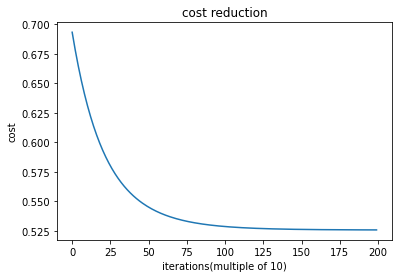

[0.06718674 0.01441553]
1.2402001817926414


In [69]:
w=[0,0]
b=0
learning=0.01
no_iterations=2000
w,b= model_predict(w,b,learning,no_iterations)
print(w)
print(b)


In [73]:
df.drop('Labels',axis=1,inplace=True)
df.to_json('input.json')